# Lab 11. 타이타닉 데이터를 이용한 교호 작용 효과 실습
---

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터를 불러와서 확인해본다.

In [7]:
# load data 
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

- 시각화를 해본다.

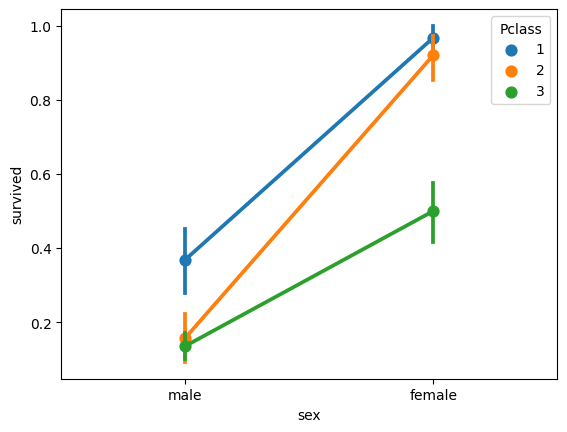

In [8]:
sns.pointplot(x="sex", y="survived", hue="pclass", data=titanic)

plt.legend(title="Pclass", loc="best")

> 모든 객실 등급에서 여성의 생존율이 남성보다 더 높다.

- 다른 방식으로 시각화를 해본다.

In [9]:
!pip install statsmodels

In [10]:
import pandas as pd 
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [11]:
titanic_df = pd.read_csv("./data/Titanic_data.csv")

print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

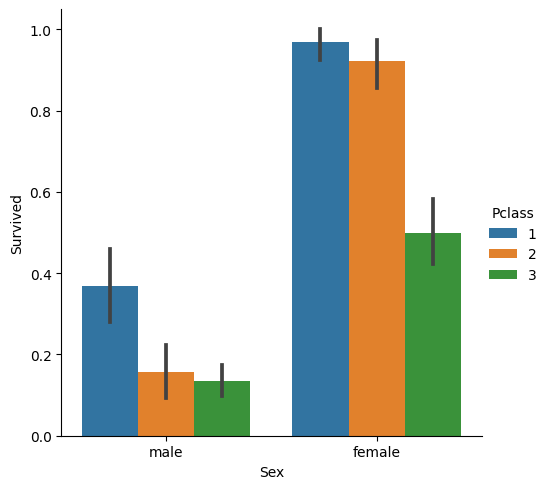

In [12]:
# 이원 분산 분석 모델 생성 
model = ols('Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)', titanic_df).fit()

# 분석 
anova_results = anova_lm(model, type=2)

# 시각화 
sns.catplot(x="Sex" , y="Survived", hue='Pclass', data=titanic_df, kind='bar')